C:\Users\rvu\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rvu\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost Evaluation
Accuracy  : 0.9736842105263158
Precision : 0.9722222222222222
Recall    : 0.9859154929577465

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



C:\Users\rvu\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rvu\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rvu\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rvu\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Cross-Validation Scores: [0.93859649 0.96491228 0.99122807 0.99122807 0.96460177]
Mean CV Accuracy: 0.9701133364384411

Single Tree Accuracy: 0.8947368421052632
Adaboost Accuracy: 0.9736842105263158


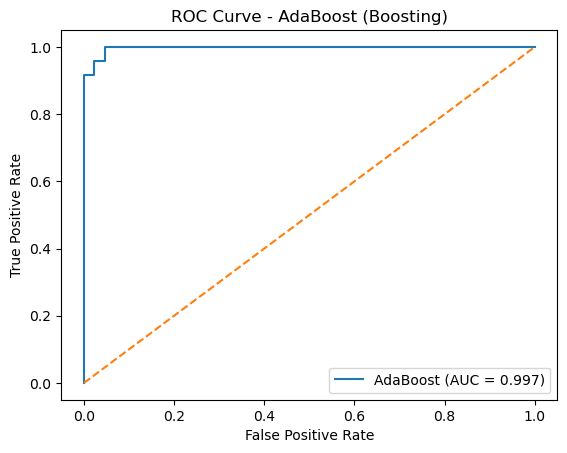

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
X, Y = load_breast_cancer(return_X_y=True)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

base_model = DecisionTreeClassifier(max_depth=1, random_state=42)

boost_model = AdaBoostClassifier(
    estimator=base_model,
    learning_rate=1.0,
    random_state=42
)
boost_model.fit(X_train, Y_train)

Y_pred = boost_model.predict(X_test)
Y_prob = boost_model.predict_proba(X_test)[:, 1]


print("Adaboost Evaluation")
print("Accuracy  :", accuracy_score(Y_test, Y_pred))
print("Precision :", precision_score(Y_test, Y_pred))
print("Recall    :", recall_score(Y_test, Y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

cv_scores = cross_val_score(boost_model, X, Y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

single_model = DecisionTreeClassifier(max_depth=1, random_state=42)
single_model.fit(X_train, Y_train)
single_pred = single_model.predict(X_test)

print("\nSingle Tree Accuracy:", accuracy_score(Y_test, single_pred))
print("Adaboost Accuracy:", accuracy_score(Y_test, Y_pred))

fpr, tpr, _ = roc_curve(Y_test, Y_prob)
auc = roc_auc_score(Y_test, Y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AdaBoost (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost (Boosting)")
plt.legend()
plt.show()